# **Lab Exam**

MANGESH SHINDE


The Framingham Heart Study is a long term prospective study of the etiology of cardiovascular disease among a population of free living subjects in the community of Framingham, Massachusetts. The Framingham Heart Study was a landmark study in epidemiology in that it was the first prospective study of cardiovascular disease and identified the concept of risk factors and their joint effects FHS Longitudinal Data Document.
The dataset is a rather small subset of possible FHS dataset, having 4240 observations and 16 variables. The variables are as follows:
sex : the gender of the observations. The variable is a binary named “male” in the dataset.
age : Age at the time of medical examination in years.
education : A categorical variable of the participants education, with the levels: Some high school (1), high school/GED (2), some college/vocational school (3), college (4)
currentSmoker: Current cigarette smoking at the time of examinations
cigsPerDay: Number of cigarettes smoked each day
BPmeds: Use of Anti-hypertensive medication at exam
prevalentStroke: Prevalent Stroke (0 = free of disease)
prevalentHyp: Prevalent Hypertensive. Subject was defined as hypertensive if treated
diabetes: Diabetic according to criteria of first exam treated
totChol: Total cholesterol (mg/dL)
sysBP: Systolic Blood Pressure (mmHg)
diaBP: Diastolic blood pressure (mmHg)
BMI: Body Mass Index, weight (kg)/height (m)^2
heartRate: Heart rate (beats/minute)
glucose: Blood glucose level (mg/dL)
And finally the response variable : + TenYearCHD : The 10 year risk of coronary heart disease(CHD).
Objective :
The goal is to make some predictive models on a FHS dataset, and reviewing some exploratory and modelling techniques.

In [1]:
import pandas as pd

df = pd.read_csv('/content/framingham.csv')


In [2]:
# Display the first few rows of the DataFrame
print(df.head())



   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2 

In [3]:
# Get summary statistics
print(df.describe())



              male          age    education  currentSmoker   cigsPerDay  \
count  4240.000000  4240.000000  4135.000000    4240.000000  4211.000000   
mean      0.429245    49.580189     1.979444       0.494104     9.005937   
std       0.495027     8.572942     1.019791       0.500024    11.922462   
min       0.000000    32.000000     1.000000       0.000000     0.000000   
25%       0.000000    42.000000     1.000000       0.000000     0.000000   
50%       0.000000    49.000000     2.000000       0.000000     0.000000   
75%       1.000000    56.000000     3.000000       1.000000    20.000000   
max       1.000000    70.000000     4.000000       1.000000    70.000000   

            BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count  4187.000000      4240.000000   4240.000000  4240.000000  4190.000000   
mean      0.029615         0.005896      0.310613     0.025708   236.699523   
std       0.169544         0.076569      0.462799     0.158280    44.591284   

In [4]:
# Display information about the DataFrame (data types, non-null counts, etc.)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB
None


Data Cleaning and Preprocessing:

In [5]:
# Example: Impute missing values in numerical columns with the mean
df.fillna(df.mean(), inplace=True)


Outlier Detection and Handling :

In [6]:
# Example: Identify and remove outliers in 'BMI' using z-score
from scipy import stats

z_scores = stats.zscore(df['BMI'])
df = df[(z_scores < 3) & (z_scores > -3)]


Feature Scaling :

In [7]:
# Example: Min-Max scaling on 'sysBP' column
df['sysBP'] = (df['sysBP'] - df['sysBP'].min()) / (df['sysBP'].max() - df['sysBP'].min())


<ipython-input-7-a735624e09b4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sysBP'] = (df['sysBP'] - df['sysBP'].min()) / (df['sysBP'].max() - df['sysBP'].min())


Convert Categorical Variables

In [8]:
# Example: Convert 'education' to categorical type
df['education'] = df['education'].astype('category')


<ipython-input-8-c17b4f2559dd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['education'] = df['education'].astype('category')


Explore Target Variable

In [9]:
# Example: Check the distribution of the target variable
print(df['TenYearCHD'].value_counts())


0    3553
1     627
Name: TenYearCHD, dtype: int64


Correlation Analysis

In [10]:
# Example: Check correlation matrix
correlation_matrix = df.corr()


<ipython-input-10-8d07d1de578d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


Data Splitting:

In [11]:
# Example: Split the data into features and target variable
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

# Example: Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Exploratory Data Analysis (EDA):

Summary Statistics:

In [12]:
print(df.describe())


              male          age  currentSmoker   cigsPerDay       BPMeds  \
count  4180.000000  4180.000000    4180.000000  4180.000000  4180.000000   
mean      0.433493    49.542105       0.496651     9.062719     0.028359   
std       0.495616     8.564461       0.500049    11.889331     0.164935   
min       0.000000    32.000000       0.000000     0.000000     0.000000   
25%       0.000000    42.000000       0.000000     0.000000     0.000000   
50%       0.000000    49.000000       0.000000     0.000000     0.000000   
75%       1.000000    56.000000       1.000000    20.000000     0.000000   
max       1.000000    70.000000       1.000000    70.000000     1.000000   

       prevalentStroke  prevalentHyp     diabetes      totChol        sysBP  \
count      4180.000000   4180.000000  4180.000000  4180.000000  4180.000000   
mean          0.005502      0.303110     0.024402   236.643296     0.294198   
std           0.073983      0.459657     0.154312    44.332919     0.130992   

Univariate Analysis:

Explore the distribution of each individual variable.

Use histograms for numerical variables and bar plots for categorical variables.

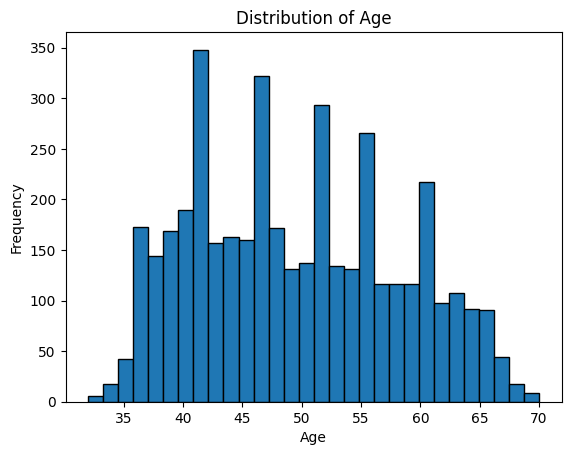

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Histogram for 'age'
plt.hist(df['age'], bins=30, edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


Bivariate Analysis:

Explore relationships between pairs of variables.

Use scatter plots for numerical-numerical relationships and box plots for numerical-categorical relationships.

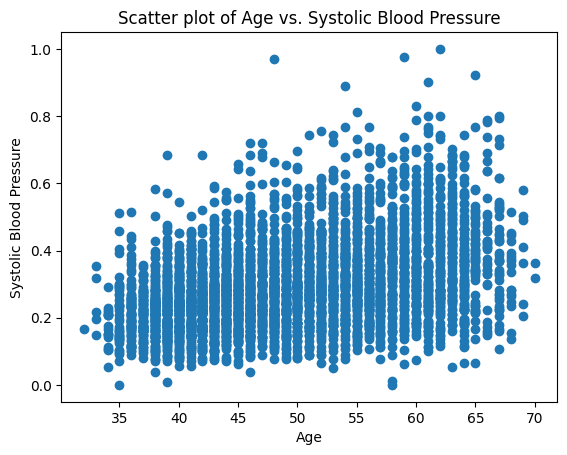

In [14]:
# Example: Scatter plot for 'age' vs. 'sysBP'
plt.scatter(df['age'], df['sysBP'])
plt.title('Scatter plot of Age vs. Systolic Blood Pressure')
plt.xlabel('Age')
plt.ylabel('Systolic Blood Pressure')
plt.show()


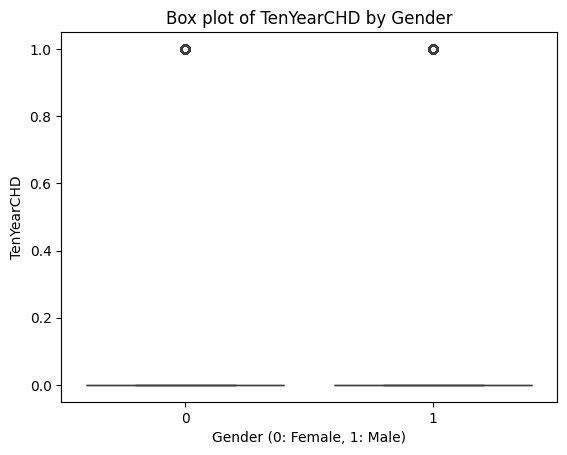

In [15]:
# Example: Box plot for 'TenYearCHD' by 'male'
sns.boxplot(x='male', y='TenYearCHD', data=df)
plt.title('Box plot of TenYearCHD by Gender')
plt.xlabel('Gender (0: Female, 1: Male)')
plt.ylabel('TenYearCHD')
plt.show()


Correlation Heatmap:

Visualize the correlation matrix to identify relationships between numerical features.

<ipython-input-16-547ebacdd224>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)


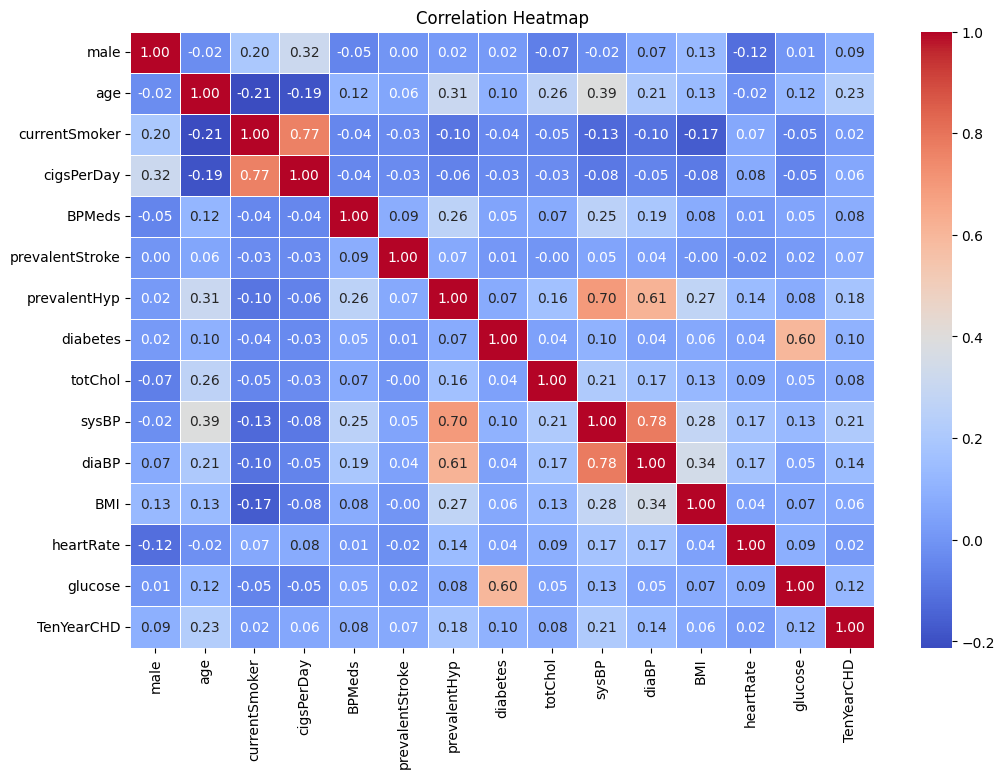

In [16]:
# Example: Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


Pair Plots:

Create pair plots to visualize relationships between multiple numerical variables.

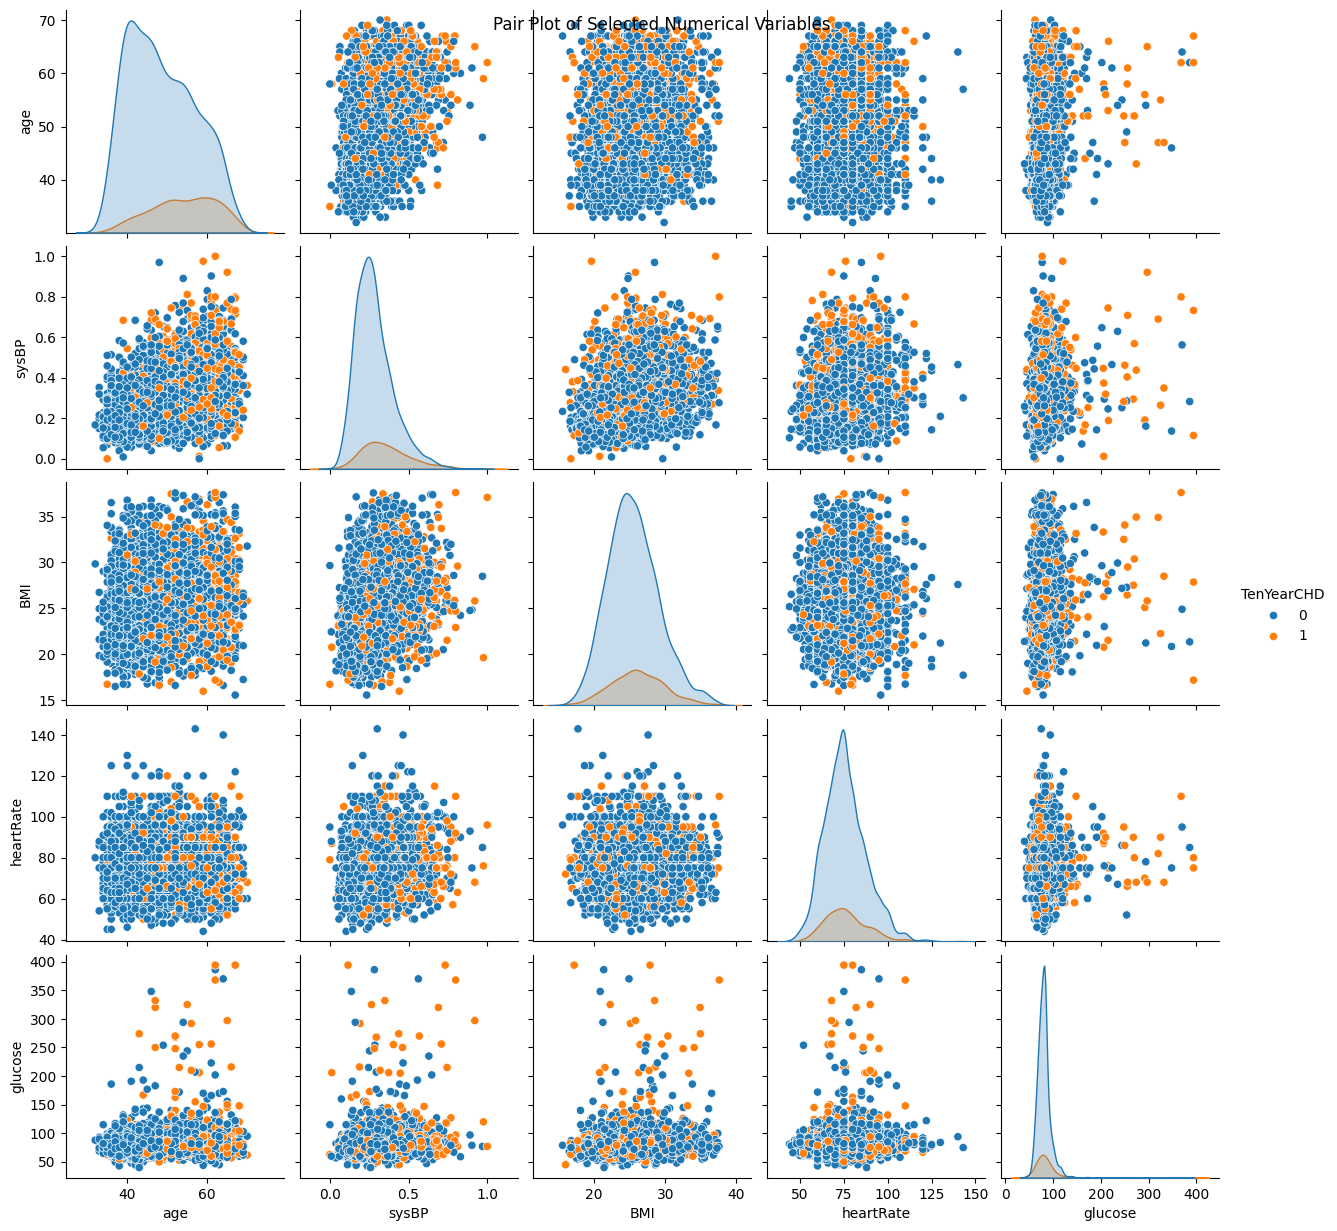

In [17]:
# Example: Pair plot for selected numerical columns
sns.pairplot(df[['age', 'sysBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']], hue='TenYearCHD')
plt.suptitle('Pair Plot of Selected Numerical Variables')
plt.show()


Categorical Variable Analysis:

Explore the distribution of categorical variables using bar plots.

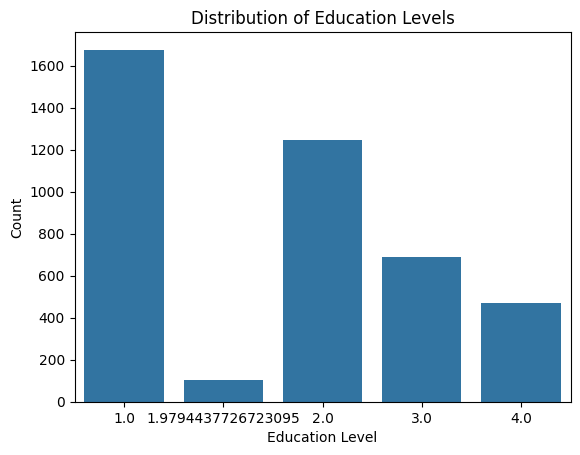

In [18]:
# Example: Bar plot for 'education'
sns.countplot(x='education', data=df)
plt.title('Distribution of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()


Split the data into features (X) and the target variable (y).
python


In [19]:
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']


Train-Test Split:
Split the dataset into training and testing sets.

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Model Training:

Train the selected models using the training dataset.
python


Model Evaluation:
Evaluate the models using the testing dataset.

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Split the data into features and target variable
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Logistic Regression
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# 2. Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# 3. Support Vector Machine (SVM)
svm_model = SVC(probability=True)  # probability=True for calculating class probabilities
svm_model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVC(probability=True)

In [22]:
# Evaluate Logistic Regression
y_pred_logreg = logreg_model.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
report_logreg = classification_report(y_test, y_pred_logreg)

# Evaluate Random Forest
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

# Evaluate Support Vector Machine (SVM)
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)

# Print the evaluation metrics
print("Logistic Regression:")
print(f"Accuracy: {accuracy_logreg}")
print("Classification Report:\n", report_logreg)

print("\nRandom Forest:")
print(f"Accuracy: {accuracy_rf}")
print("Classification Report:\n", report_rf)

print("\nSupport Vector Machine (SVM):")
print(f"Accuracy: {accuracy_svm}")
print("Classification Report:\n", report_svm)


Logistic Regression:
Accuracy: 0.8636363636363636
Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93       724
           1       0.25      0.01      0.02       112

    accuracy                           0.86       836
   macro avg       0.56      0.50      0.47       836
weighted avg       0.78      0.86      0.80       836


Random Forest:
Accuracy: 0.8696172248803827
Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93       724
           1       0.67      0.05      0.10       112

    accuracy                           0.87       836
   macro avg       0.77      0.52      0.51       836
weighted avg       0.84      0.87      0.82       836


Support Vector Machine (SVM):
Accuracy: 0.8660287081339713
Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93       724
          

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
from sklearn.metrics import accuracy_score, classification_report

# Evaluate Logistic Regression
y_pred_logreg = logreg_model.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
report_logreg = classification_report(y_test, y_pred_logreg)

# Evaluate Random Forest
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

# Evaluate Support Vector Machine (SVM)
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)

# Print the evaluation metrics
print("Logistic Regression:")
print(f"Accuracy: {accuracy_logreg}")
print("Classification Report:\n", report_logreg)

print("\nRandom Forest:")
print(f"Accuracy: {accuracy_rf}")
print("Classification Report:\n", report_rf)

print("\nSupport Vector Machine (SVM):")
print(f"Accuracy: {accuracy_svm}")
print("Classification Report:\n", report_svm)


Logistic Regression:
Accuracy: 0.8636363636363636
Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93       724
           1       0.25      0.01      0.02       112

    accuracy                           0.86       836
   macro avg       0.56      0.50      0.47       836
weighted avg       0.78      0.86      0.80       836


Random Forest:
Accuracy: 0.8696172248803827
Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93       724
           1       0.67      0.05      0.10       112

    accuracy                           0.87       836
   macro avg       0.77      0.52      0.51       836
weighted avg       0.84      0.87      0.82       836


Support Vector Machine (SVM):
Accuracy: 0.8660287081339713
Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93       724
          

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Hyperparameter Tuning :
Fine-tune hyperparameters to optimize model performance.

In [24]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Random Forest model
rf_model = RandomForestClassifier()

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Use the best model for evaluation
best_rf_model = grid_search.best_estimator_
y_pred_rf_tuned = best_rf_model.predict(X_test)
accuracy_rf_tuned = accuracy_score(y_test, y_pred_rf_tuned)
report_rf_tuned = classification_report(y_test, y_pred_rf_tuned)

# Print the best parameters and evaluation metrics
print("Best Hyperparameters:", best_params)
print("\nRandom Forest (Tuned):")
print(f"Accuracy: {accuracy_rf_tuned}")
print("Classification Report:\n", report_rf_tuned)


Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}

Random Forest (Tuned):
Accuracy: 0.8660287081339713
Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93       724
           1       0.50      0.02      0.03       112

    accuracy                           0.87       836
   macro avg       0.68      0.51      0.48       836
weighted avg       0.82      0.87      0.81       836



Model Interpretation and Feature Importance:
Understand the importance of features in the models.

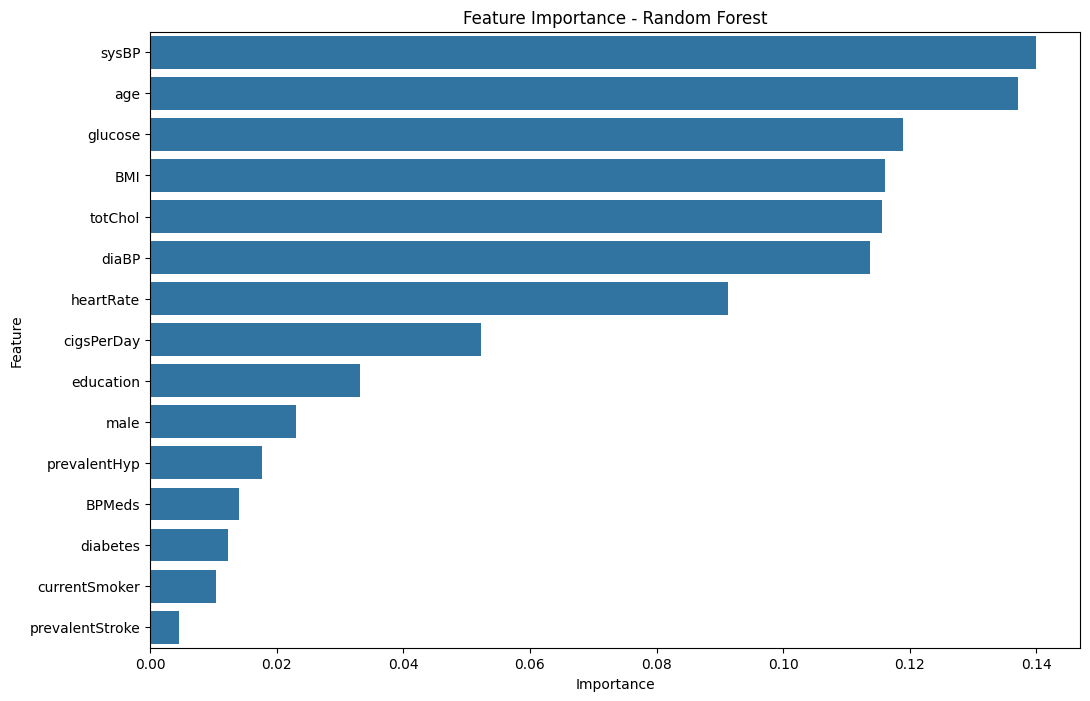

Feature Importance - Random Forest:
            Feature  Importance
10            sysBP    0.139885
1               age    0.137152
14          glucose    0.118940
12              BMI    0.116058
9           totChol    0.115660
11            diaBP    0.113696
13        heartRate    0.091271
4        cigsPerDay    0.052295
2         education    0.033183
0              male    0.023002
7      prevalentHyp    0.017617
5            BPMeds    0.014004
8          diabetes    0.012314
3     currentSmoker    0.010342
6   prevalentStroke    0.004582


In [25]:
# Feature importance for Random Forest
feature_importances = best_rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importance
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Display feature importance in a table
print("Feature Importance - Random Forest:")
print(feature_importance_df)


Save the Final Model:

In [38]:
import pickle

# Assuming logreg_model is your Logistic Regression model
with open('logistic_regression_model.pkl', 'wb') as f:
    pickle.dump(logreg_model, f)


In [33]:
pip install streamlit


In [34]:
! pip install streamlit -q

In [39]:
!wget -q -O - ipv4.icanhazip.com

34.80.207.199


In [42]:
! streamlit run CHD.py & npx localtunnel --port 8501

[..................] | loadIdealTree:loadAllDepsIntoIdealTree: sill install loa


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.80.207.199:8501

npx: installed 22 in 3.093s
your url is: https://ready-masks-happen.loca.lt
  Stopping...
^C
